1.stop word removal

In [1]:
#install & import required libraries
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#defining stopword removal function
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

def remove_stopwords(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuations])
    # Tokenize and remove stopwords
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

In [3]:
#load balanced data
import pandas as pd
df=pd.read_csv('balanced_data_1.csv')

In [4]:
#view
df.head()

,Unnamed: 0,Rating,Review
0,0,4.0,its been a great entry point for our family in...
1,1,3.0,it is great to be able to connect to my larger...
2,2,5.0,there is nothing to complain about this product
3,3,1.0,i bought two of the gb sandisk ultra microsdhc...
4,4,2.0,terrible sound quality i dont have much idea a...


In [5]:
#apply function to balanced data
df['Review'] = df['Review'].astype(str).apply(remove_stopwords)

In [6]:
#view
df['Review'].head()

0    great entry point family echo learning use ent...
1    great able connect larger echo alexa functiona...
2                             nothing complain product
3    bought two gb sandisk ultra microsdhc cards un...
4    terrible sound quality dont much idea songs ed...
Name: Review, dtype: object

In [7]:
#print sample stop words
from nltk.corpus import stopwords

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Print first 20 stopwords
print("Sample Stop Words:")
print(list(stop_words)[:20])

Sample Stop Words:
['for', 'itself', 'but', 'now', 'of', 'where', 'on', 'nor', 'above', "wasn't", 'yours', "mightn't", 'she', 'shouldn', 'doing', 'own', 'the', 'ain', 'didn', 'me']


2.Lemmatization

In [8]:
#required libraries
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
#defining lemmatization function
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)

In [10]:
#apply function on balanced data
df['Review'] = df['Review'].apply(lemmatize_text)

In [11]:
#view
df['Review'].head()

0    great entry point family echo learning use ent...
1    great able connect larger echo alexa functiona...
2                             nothing complain product
3    bought two gb sandisk ultra microsdhc card unu...
4    terrible sound quality dont much idea song edm...
Name: Review, dtype: object

3.Filter out short and long reviews

In [12]:
# Count reviews with fewer than 3 words
short_reviews_count = df['Review'].apply(lambda x: len(x.split()) < 3).sum()

# Count reviews with more than 100 words (or any threshold you prefer)
long_reviews_count = df['Review'].apply(lambda x: len(x.split()) > 200).sum()

print(f"Reviews with fewer than 3 words: {short_reviews_count}")
print(f"Reviews with more than 100 words: {long_reviews_count}")

Reviews with fewer than 3 words: 1014
Reviews with more than 100 words: 47


In [13]:
# Keep only reviews that have word count between 3 and 200
filtered_df = df[df['Review'].apply(lambda x: 3 <= len(x.split()) <= 200)].reset_index(drop=True)

In [14]:
#rating class distribution
filtered_df['Rating'].value_counts().sort_index()

Rating
1.0    2752
2.0    2815
3.0    2804
4.0    2773
5.0    2724
Name: count, dtype: int64

In [15]:
#check nulls
filtered_df.isnull().sum()

Unnamed: 0    0
Rating        0
Review        0
dtype: int64

In [16]:
#check duplicates
filtered_df.duplicated().sum()

np.int64(0)

In [17]:
#remove duplicate
filtered_df.drop_duplicates(inplace=True)

In [18]:
#balancing it after filtering
# Define target size
target_count = 2700

# Downsample each class
balanced_df_final = (
    filtered_df.groupby('Rating')
    .apply(lambda x: x.sample(n=target_count, random_state=42))
    .reset_index(drop=True)
)

C:\Users\User\AppData\Local\Temp\ipykernel_41080\980095825.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_count, random_state=42))


In [19]:
#view
balanced_df_final.head()

,Unnamed: 0,Rating,Review
0,7345,1.0,old product received manufactureree november i...
1,2635,1.0,cant ask alexa send text make call unless pers...
2,2188,1.0,battery performance per standard mentioned
3,1924,1.0,software problem dont buy mobile
4,13948,1.0,worst product send amazon


In [21]:
balanced_df_final.drop(['Unnamed: 0'],axis=1,inplace=True)

4.Visualizations

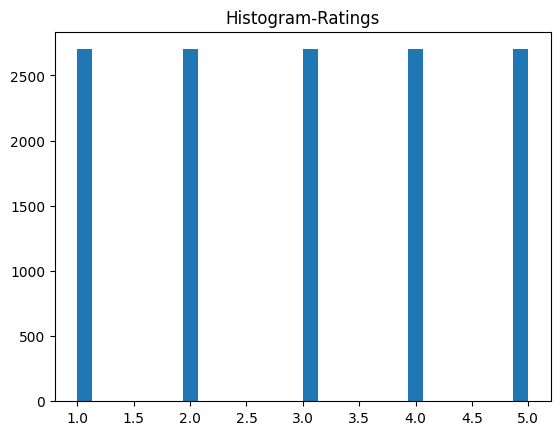

In [22]:
import matplotlib.pyplot as plt
#histogram of rating
plt.hist(balanced_df_final['Rating'],bins=30)
plt.title('Histogram-Ratings')
plt.show()

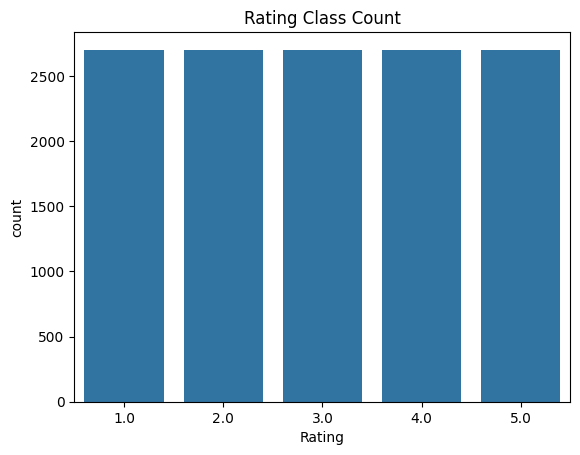

In [23]:
import seaborn as sns
#Count plot (for categorical data)
sns.countplot(x='Rating', data=balanced_df_final)
plt.title("Rating Class Count")
plt.show()

5.shuffle data

In [24]:
# Shuffle the balanced data
balanced_df_final = balanced_df_final.sample(frac=1, random_state=42).reset_index(drop=True)

In [25]:
#view
balanced_df_final.head()

,Rating,Review
0,1.0,saw photo young woman wearing dress review loo...
1,5.0,discount little speaker thump effect goodvolum...
2,1.0,doesnt anything seems worthless
3,3.0,athletic build excited dress arrive removed pa...
4,5.0,high quality material appropriate like feeling...


Print Min/Max Review Length and Counts

In [26]:
for rating in sorted(balanced_df_final['Rating'].unique()):
    # Filter data by rating
    subset = balanced_df_final[balanced_df_final['Rating'] == rating]
    
    # Compute review lengths (word count)
    lengths = subset['Review'].apply(lambda x: len(x.split()))
    
    min_len = lengths.min()
    max_len = lengths.max()
    
    min_count = (lengths == min_len).sum()
    max_count = (lengths == max_len).sum()
    
    min_sample = subset[lengths == min_len].iloc[0]['Review']
    max_sample = subset[lengths == max_len].iloc[0]['Review']
    
    print(f"\n🔹 Rating: {int(rating)}")
    print(f"  • Min review length: {min_len} words (Count: {min_count})")
    print(f"    Sample: {min_sample}")
    print(f"  • Max review length: {max_len} words (Count: {max_count})")
    print(f"    Sample: {max_sample}")



🔹 Rating: 1
  • Min review length: 3 words (Count: 175)
    Sample: dont buy thisworst
  • Max review length: 199 words (Count: 1)
    Sample: hey guy ordered samsung m sep arrived next day couldnt use mobile day getting due traveled village wont get wifi network properly kept box started using day trust guy honest feedback using day mobile lot network issue im able call anyone kept flight mode twice refresh network unable call later restarted mobile tried call didnt work issue faced short span time usage st day mobile got hanged couple second installing apps mobile responding quickly waste gb ram call meanwhile got call whatsapp automatically speaker turned able turn continued call till end speaker started talking whatsapp sometime able turned speaker kept disturb mode sometime got missed call notification tried call back turning disturb mode able call number giving beep sound second later sound getting disconnected automatically im mood hit mobile ground im gamer dont take pic much 

6.display sample reviews per rating

In [27]:
for rating in sorted(balanced_df_final['Rating'].unique()):
    print(f"\n Rating: {int(rating)}")
    samples = balanced_df_final[balanced_df_final['Rating'] == rating].sample(3, random_state=42)
    for i, review in enumerate(samples['Review'].values, 1):
        print(f"{i}. {review}\n")


 Rating: 1
1. poor camera build quality extremely disappointed

2. dont waste money another device already listen music one device time account course warning purchasing less useful hockey puck

3. cheapest quality paper useddont even think buy ithalf word visible


 Rating: 2
1. hard time getting work keep getting dont know lot

2. kindly read carefully going purchase galaxy first big problem phone network issue heating problem battery back also expected equal mah compare mobile camera quality also good weak pixel quality processor also old working slow legging slow finger print sensor one thing good get proper notification voice quality also good annoying worst product samsung faith samsung type phone expected samsung cant compare phone brand r want return phone option refund purchasing replace cant get refund

3. although nothhing wrong speaker everything seems working fine gave star sound quality sound quality important come speaker speaker loud turning volume way still produce ha

7.Train-test-split

In [28]:
from sklearn.model_selection import train_test_split

# Features and labels
X = balanced_df_final['Review']
y = balanced_df_final['Rating']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

TF-IDF vectorization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # or use None for all features

# Fit on training data and transform both train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)